# Statistics for Data Analysis: R Exercises 9

In this practical we are going to learn how to ﬁt and interpret a linear regression model in R.
1. The girls birthweight data.

The data are the birthweight (grams) and gestational age (weeks) for 12 girls born in a certain hospital. The aim is to investigate how the birthweight depends on age. We can import the data from a text ﬁle with the command read.table:


In [1]:
dat <- read.csv("data/girls.csv",header=TRUE)
head(dat) # this shows the first few rows of a dataset 
x=dat$Week
y=dat$Weight

X,Week,Weight
1,40,3317
2,36,2729
3,40,2935
4,38,2754
5,42,3210
6,39,2817


and then ﬁt a linear regression model of birthweight (y, response variable) on age (x, predictor):

In [2]:
attach(dat) # to access columns directly
lm1 <- lm(y ~ x, data=dat)
lm1 # to see the object lm1 
summary(lm1) # to see a more useful summary


Call:
lm(formula = y ~ x, data = dat)

Coefficients:
(Intercept)            x  
    -2141.7        130.4  



Call:
lm(formula = y ~ x, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-144.13 -130.03  -64.23  161.57  242.67 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2141.67    1016.05  -2.108 0.061265 .  
x             130.40      26.19   4.978 0.000555 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 157.7 on 10 degrees of freedom
Multiple R-squared:  0.7125,	Adjusted R-squared:  0.6837 
F-statistic: 24.78 on 1 and 10 DF,  p-value: 0.0005549


Look at the summary of the regression, where we have ﬁtted the model Yi = β0+β1xi+εi, for i = 1,...,12, where Yi and xi are respectively the birthweight and age of the ith girl, and the εi’s are i.i.d. N(0,σ2) random variables. 
* Find out in the output the estimates of the intercept (β0) and the slope (β1), together with their respective estimated standard deviation (standard errors).

$β_{0} = −2141.67, se(\hat{β}_{0}) = 1016.05), β_{1} = 130.40, se(β_{1}) = 26.19.$

* What is our estimate of σ?

In [3]:
summary(lm1)$sigma  # This is also obtainable from the summary table above, as the RSE

[1] 157.7105

Now we will look at the residuals and ﬁtted values for this ﬁtted model.

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

,y,fit,res
1,3317,3074.333,242.66667
2,2729,2552.733,176.26667
3,2935,3074.333,-139.33333
4,2754,2813.533,-59.53333
5,3210,3335.133,-125.13333
6,2817,2943.933,-126.93333
7,3126,3074.333,51.66667
8,2539,2683.133,-144.13333
9,2412,2552.733,-140.73333
10,2991,2813.533,177.46667


logical(0)

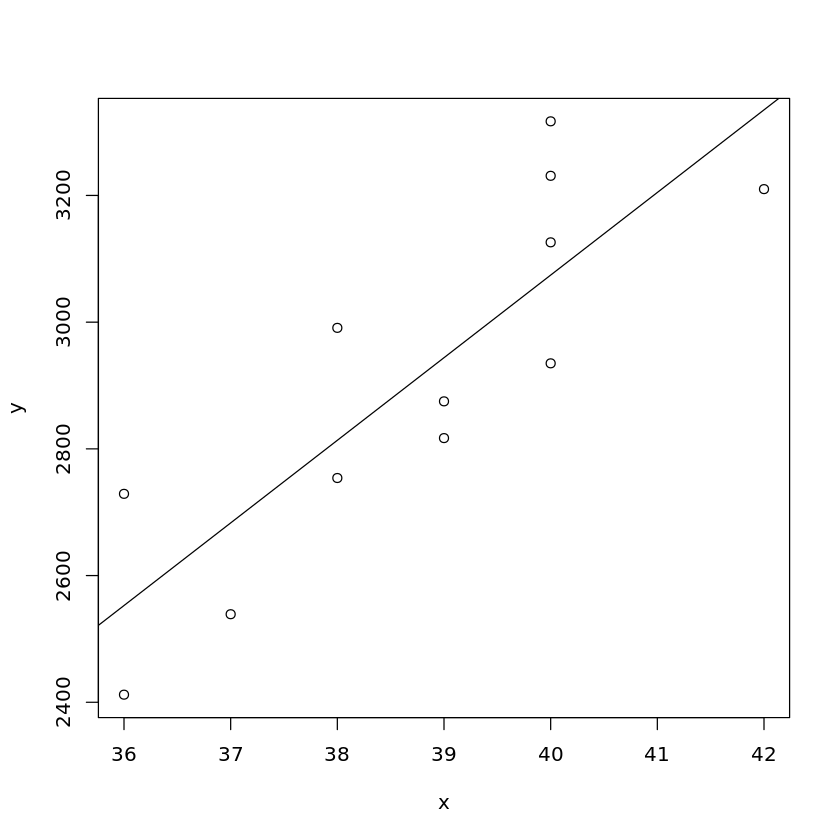

In [4]:
names(lm1) # to see what is in this lm object 
res <- lm1$residuals # residuals 
fit <- lm1$fitted.values # fitted values 
cbind(y, fit, res) # cbind is column bind 
plot(x, y) > abline(lm1)

This is a plot of the data and of the ﬁtted line. Remember that the model assumes constant variance for the errors, and that in the linear model the ﬁtted values and the residuals should be uncorrelated. Does the following plot give any evidence against this?


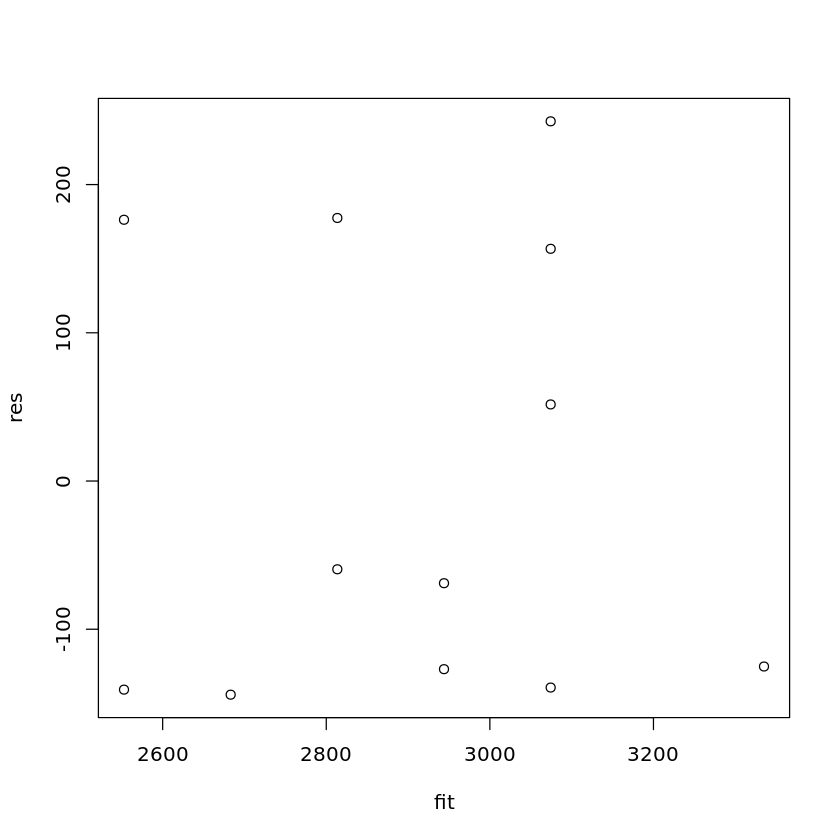

In [5]:
plot(fit, res)

* We wish to test the hypothesis H0 : β1 = 0 at level α = 0.05. Write down the relevant t-statistic and carry out the test by comparing it with the appropriate quantile of the student t distribution (using qt). Do you reject H0 or not? Does your conclusion ﬁt with your common sense about these data? 

In [13]:
qt(0.975, df=10)

[1] 2.228139

_Since $|T| = 4.978 >2.228$, we reject the null hypothesis, and conclude that $β_{1} \neq 0$._

* Can you calculate a 95% conﬁdence interval for β1? 

In [12]:
CI = lm1$coefficients[2] + c(-1,1)*26.19*qt(0.975, df=10)
CI

[1]  72.04504 188.75496

* What could be a prediction for the birthweight of a future baby girl born at the 41-th week?

In [6]:
yhat<-lm1$coefficients[1]+lm1$coefficients[2]*41
yhat

(Intercept) 
   3204.733

2. __Exploring Q-Q plots__. The following lines of code explore what Q-Q plots look like, when data are sampled from diﬀerent distributions. 

    The command rnorm(50) generates a vector containing a sample of 50 simulated N(0,1) observations, the function qqnorm makes the plot and qqline draws the line.


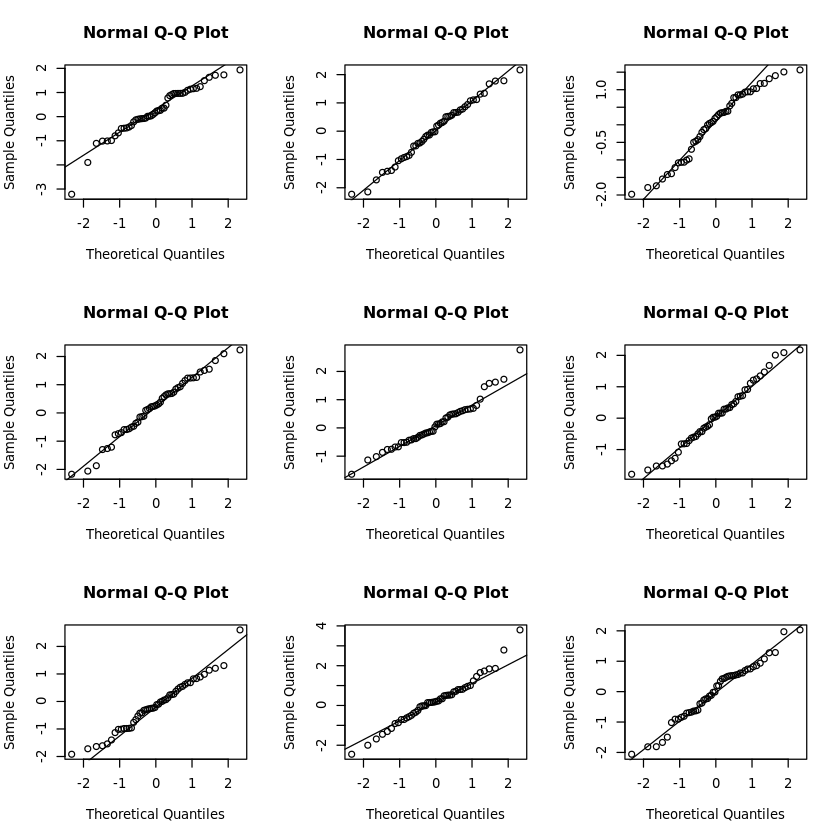

In [7]:
par(mfrow=c(3,3)) # to get 3 rows and 3 columns of plots on a page 
for(i in 1:9){ # this is a loop in R 
    y<-rnorm(50) 
    qqnorm(y) 
    qqline(y)
}

The for(i in 1:9) does the qqnorm(rnorm(50)) 9 times, resulting in 9 Q-Q plots. These give you an idea of the amount of variation that might be expected in the plots when the data are in fact normally distributed. Try varying the sample size to 15, and then to 300. It is also helpful to see what Q-Q plots look like when the data are not normal:


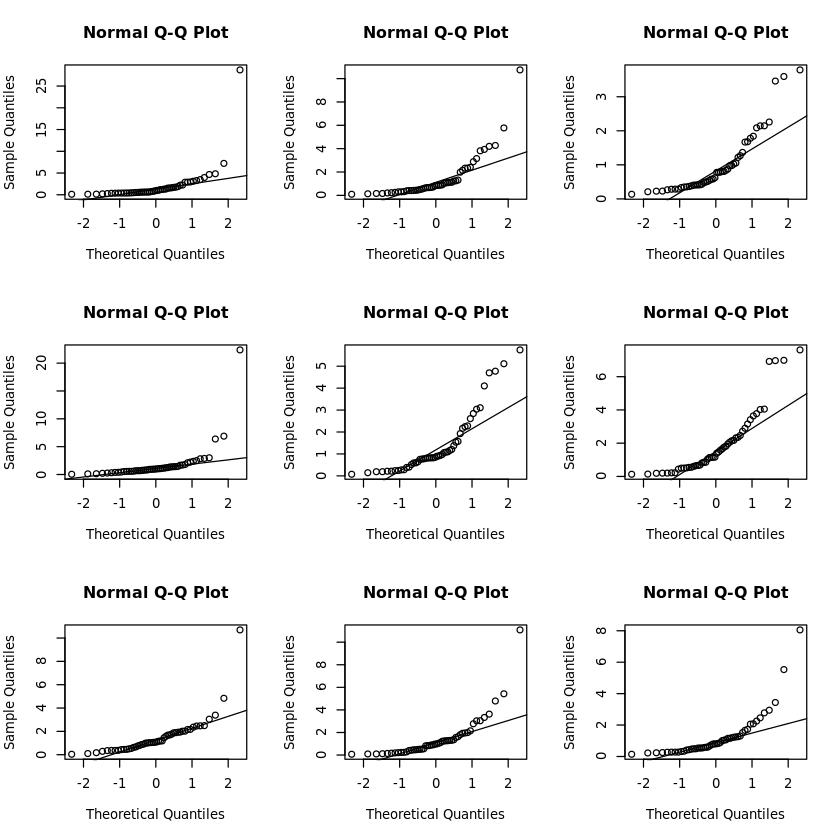

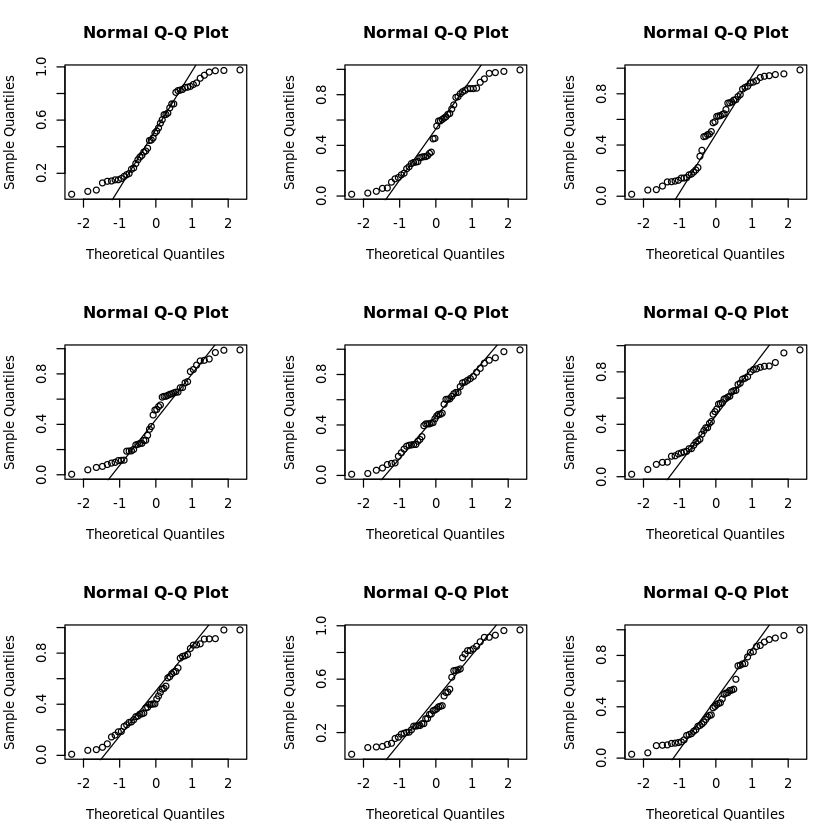

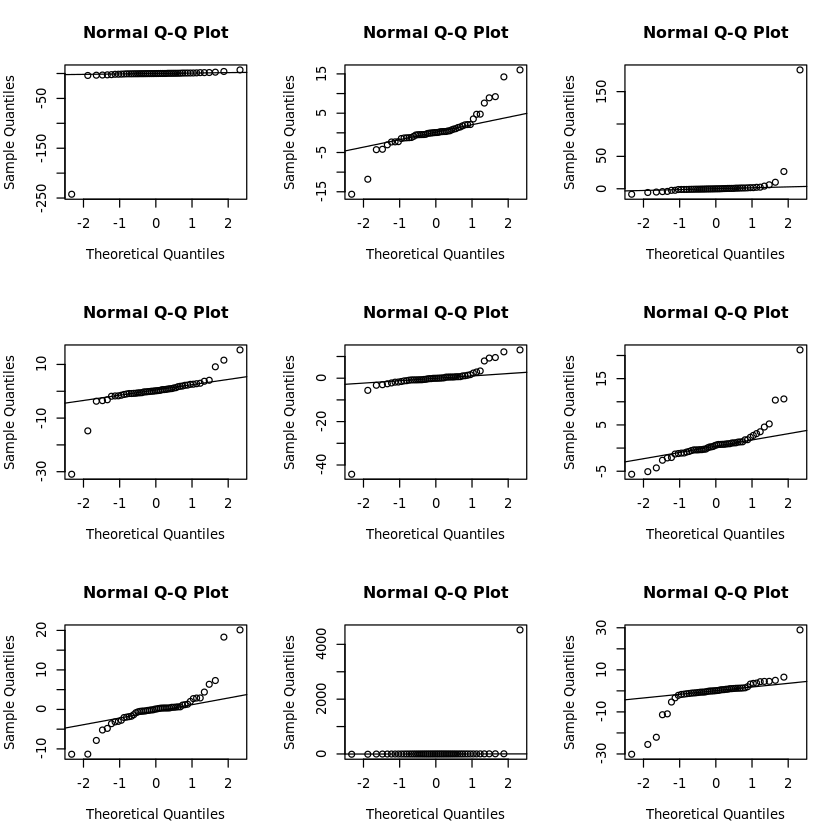

In [8]:
par(mfrow=c(3,3)) # to get 3 rows and 3 columns of plots on a page 
for (i in 1:9){
    y<-exp(rnorm(50)) # lognormal 
    qqnorm(y)
    qqline(y)
}

par(mfrow=c(3,3)) # to get 3 rows and 3 columns of plots on a page 
for (i in 1:9){
    y<-runif(50) # uniform, short-tails
    qqnorm(y)
    qqline(y)
}

par(mfrow=c(3,3)) # to get 3 rows and 3 columns of plots on a page 
for (i in 1:9){
    y<-rcauchy(50) # cauchy, heavy-tails
    qqnorm(y)
    qqline(y)
}

and the diﬀerence between constant and non-constant variance in the plot of the residuals:

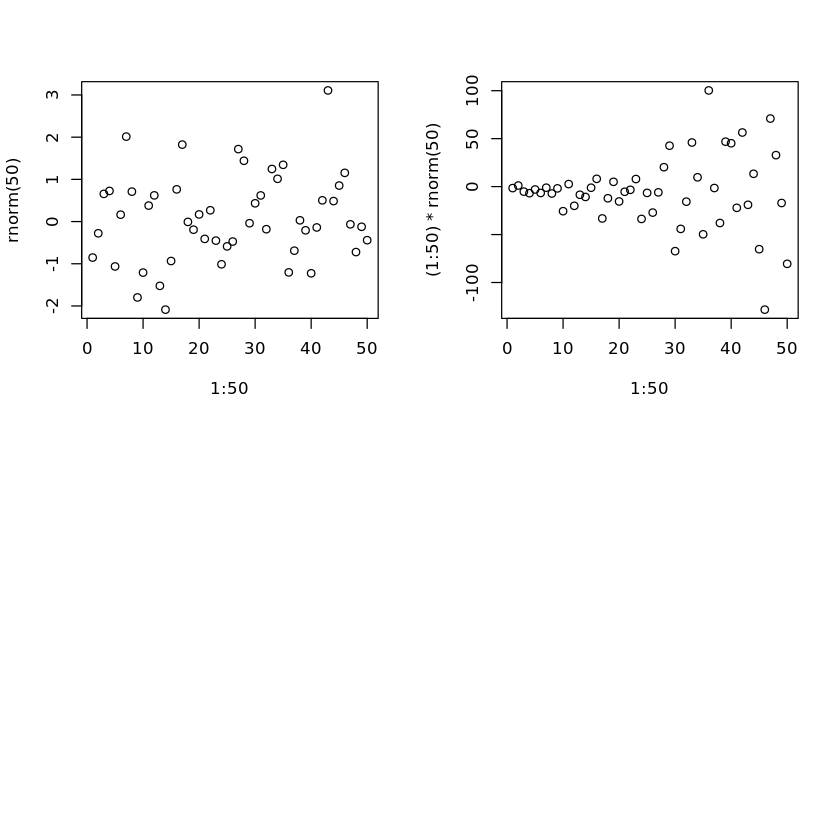

In [39]:
par(mfrow=c(2,2)) # back to one plot per page 
plot(1:50, rnorm(50)) # constant variance 
plot(1:50,(1:50)*rnorm(50)) # nonconstant variance

You can use these examples as reference when evaluating the Q-Q plots from your data analysis

3. __Anscombe quartet__ We consider here a famous example proposed by Francis Anscombe in the 1973 paper “Graphs in statistical analysis”, American Statistician, 27, 17–21. The aim of the example is to illustrate the essential role of graphical diagnostics in the analysis. It consists of four diﬀerent datasets containing each a response variable y and a predictor x. The data can be imported in R with the command


In [9]:
data(anscombe) 
head(anscombe)

x1,x2,x3,x4,y1,y2,y3,y4
10,10,10,8,8.04,9.14,7.46,6.58
8,8,8,8,6.95,8.14,6.77,5.76
13,13,13,8,7.58,8.74,12.74,7.71
9,9,9,8,8.81,8.77,7.11,8.84
11,11,11,8,8.33,9.26,7.81,8.47
14,14,14,8,9.96,8.10,8.84,7.04


and we can ﬁt a linear model for each pair (x,y)

In [10]:
attach(anscombe)
lm.1<-lm(y1~x1)
lm.2<-lm(y2~x2)
lm.3<-lm(y3~x3)
lm.4<-lm(y4~x4)

* Looking at the summary of this four models, can you see any diﬀerence between them? 

_No, all the four datasets lead to exactly the same ﬁtted model, with the same RSS and standard errors. Moreover, the test statistics of the usual hypothesis tests are the same and they would lead to accept the linear relationship between y and x for all the four datasets._

* Consider the diagnostic plots for the four models:

Warning message:
“not plotting observations with leverage one:
  8”Warning message:
“not plotting observations with leverage one:
  8”

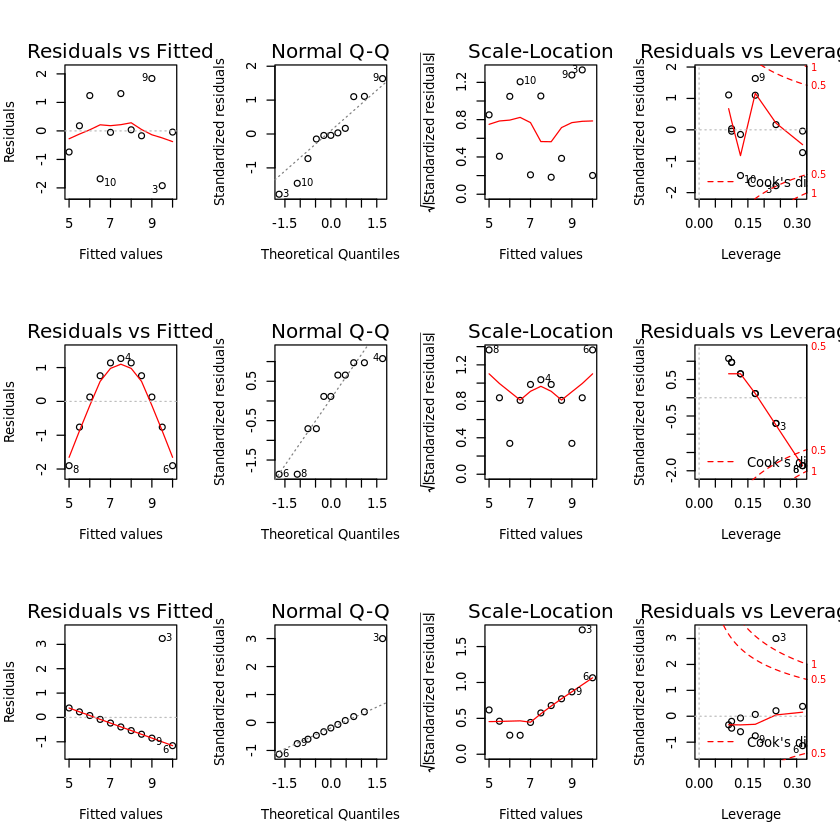

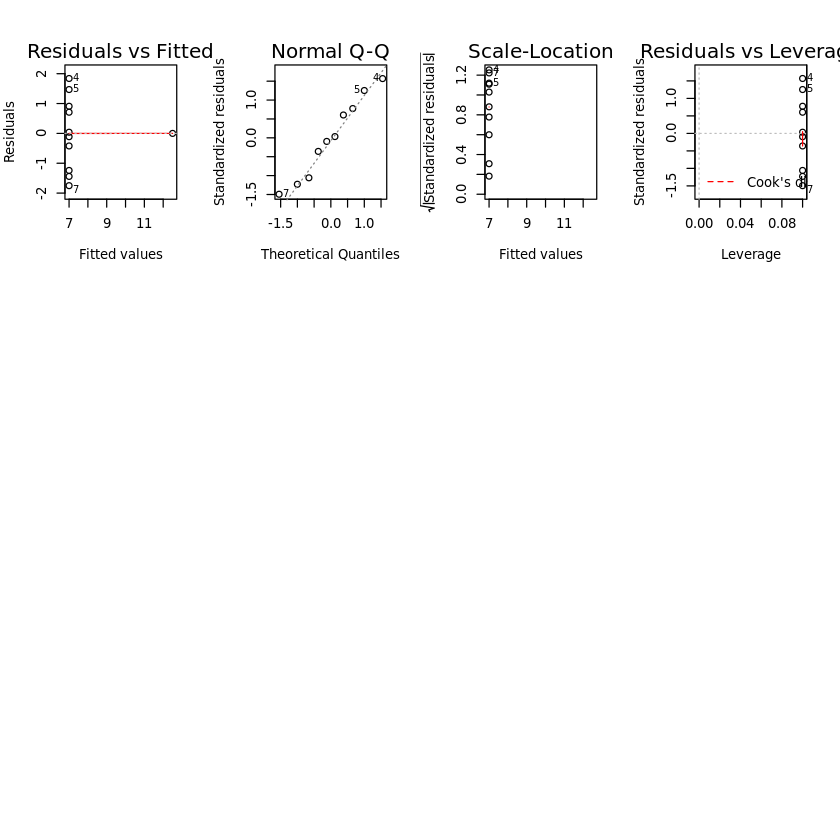

In [25]:
par(mfrow=c(3,4)) # to get 3 rows and 3 columns of plots on a page 
plot(lm.1)
plot(lm.2)
plot(lm.3)
plot(lm.4)

Can you spot problems about the model assumptions in each case? Check also the scatterplot predictor vs response variable.


_The ﬁrst dataset is the only one that allows to ﬁt a linear model. Dataset 2 contains an evident quadratic term that can be seen in the plot of the residuals (the residuals do not appear normally distributed as well). Dataset 3 contains an outlier that shifts dramatically the estimate of the least squares line, this can be seen from the plot of the residuals. In dataset 4, the scatterplot shows that is completely meaningless to ﬁt a linear model here, since all the observations except one have the same value for the predictors and thus the slope of the line is completely determined by just one data point._